Importing Dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [49]:
calories = pd.read_csv('calories.csv')

In [50]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [51]:
exercise_data = pd.read_csv('exercise.csv')

In [52]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the Two Dataframes

In [53]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis = 1)

In [54]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [55]:
calories_data.shape

(15000, 9)

In [56]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [57]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [58]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [59]:
sns.set()

<Figure size 600x600 with 0 Axes>

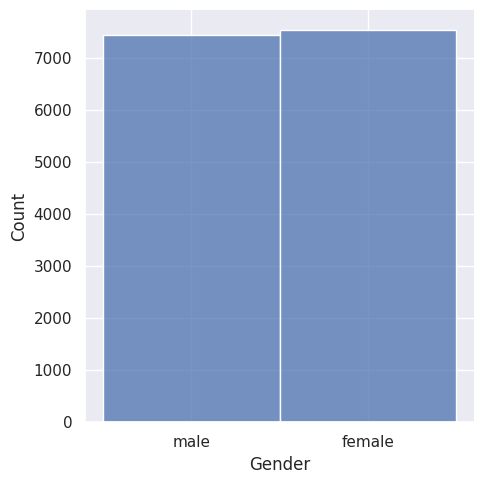

In [60]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Gender'])

Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

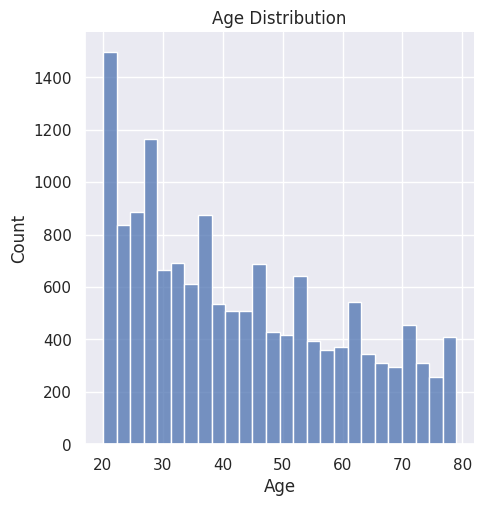

In [61]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Height Distribution')

<Figure size 600x600 with 0 Axes>

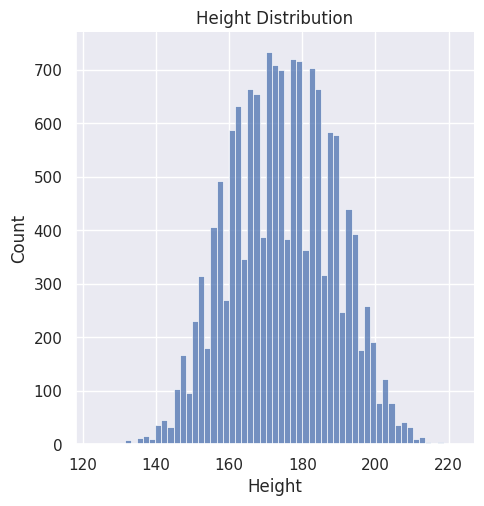

In [62]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Height'])
plt.title('Height Distribution')

Text(0.5, 1.0, 'Weight Distribution')

<Figure size 600x600 with 0 Axes>

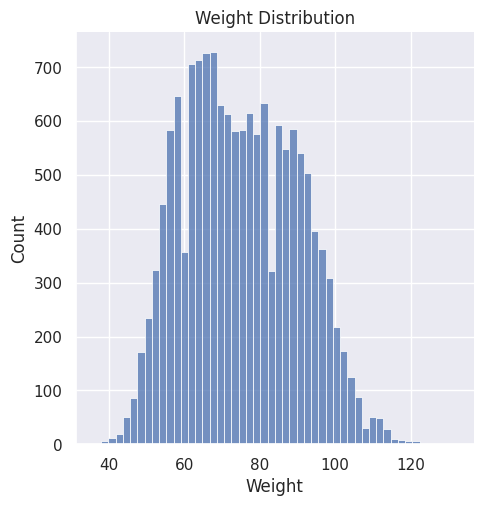

In [63]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Weight'])
plt.title('Weight Distribution')

Text(0.5, 1.0, 'Duration Distribution')

<Figure size 600x600 with 0 Axes>

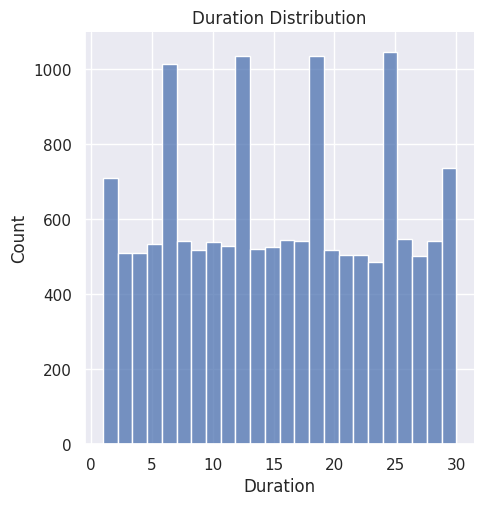

In [64]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Duration'])
plt.title('Duration Distribution')

Text(0.5, 1.0, 'Heart Rate Distribution')

<Figure size 600x600 with 0 Axes>

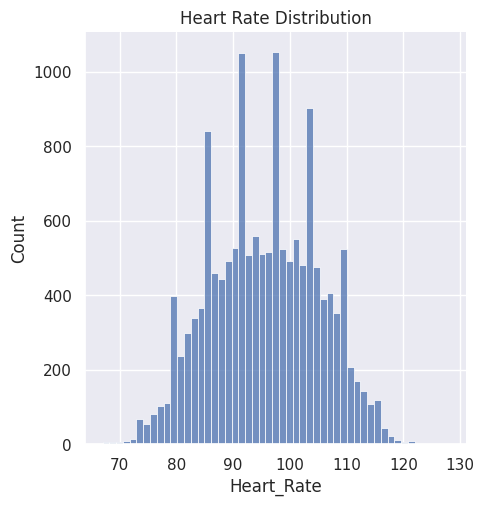

In [65]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Heart_Rate'])
plt.title('Heart Rate Distribution')

Text(0.5, 1.0, 'Body Temperature Distribution')

<Figure size 600x600 with 0 Axes>

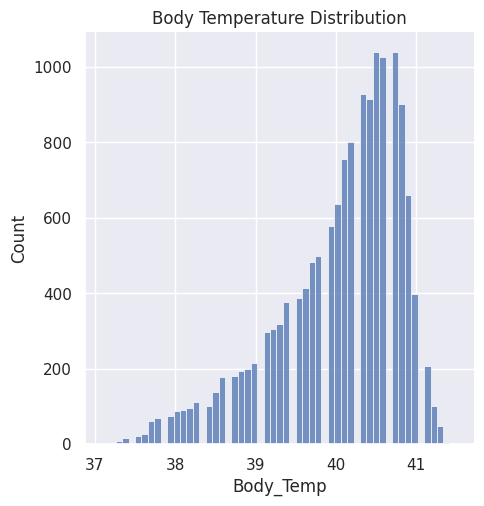

In [66]:
plt.figure(figsize = (6,6))
sns.displot(calories_data['Body_Temp'])
plt.title('Body Temperature Distribution')

Finding Correlation in the Dataset

In [67]:
correlation = calories_data.corr()

<ipython-input-67-65125daba8ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


Constructing HeatMap to understand Correlation

<Axes: >

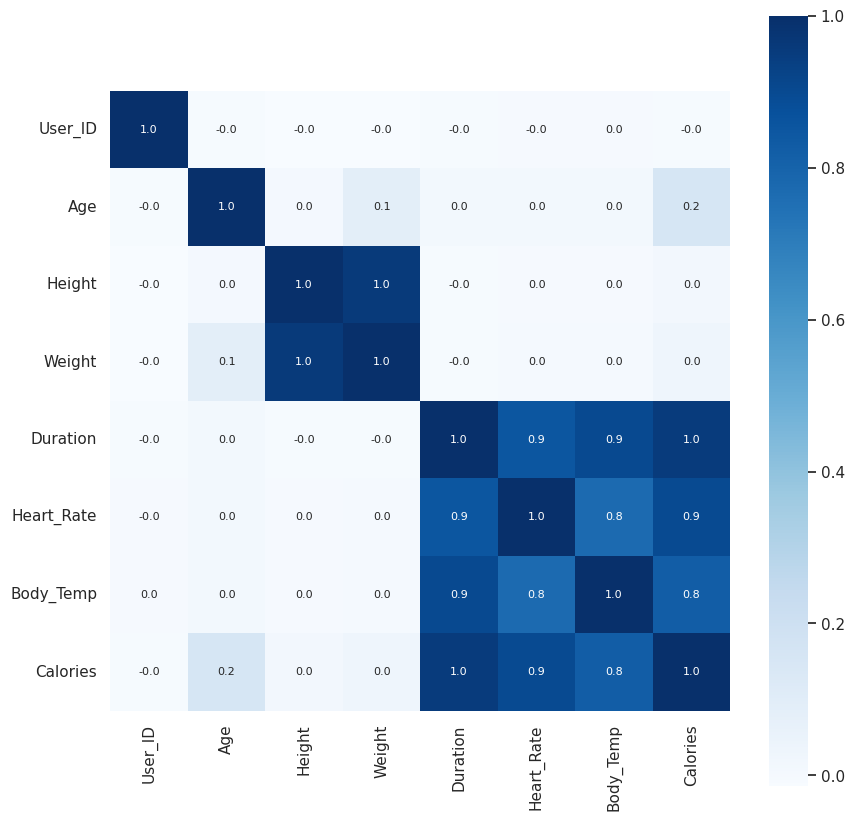

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data Encoding

In [69]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [70]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Feature and Target Separation

In [71]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

Splitting the Dat into Train and Test

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [74]:
model = XGBRegressor()

In [75]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [76]:
training_data_prediction = model.predict(X_train)

Mean Absolute Error

In [77]:
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Aboslute Error : ", mae_train)

Mean Aboslute Error :  0.9322033420062313


Model Testing

In [78]:
test_data_prediction = model.predict(X_test)

In [79]:
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Aboslute Error : ", mae_test)

Mean Aboslute Error :  1.4833678883314132
